<a href="https://colab.research.google.com/github/gururajan3/Check/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load all Dataframes

In [0]:
questionsds = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv',encoding='ISO-8859-1')
questionsds.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
answerds = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv',encoding='ISO-8859-1')
answerds.head()  

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [0]:
tagsds = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv',encoding='ISO-8859-1')
tagsds.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [0]:
usersds = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv',encoding='ISO-8859-1')
usersds.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


## Check shape of all Dataframe

In [0]:
questionsds.shape

(1264216, 7)

In [0]:
answerds.shape

(2014516, 6)

In [0]:
tagsds.shape

(3750994, 2)

In [0]:
usersds.shape

(1990480, 9)

## Check for null Values and calculate the percentage of them

In [0]:
questionsds.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [0]:
answerds.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

In [0]:
tagsds.isnull().sum()

Id        0
Tag    1113
dtype: int64

In [0]:
usersds.isnull().sum()

Unnamed: 0            0
id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [0]:
missingPercForOwner = (questionsds.OwnerUserId.isnull().sum()/len(questionsds.OwnerUserId)) * 100
print (missingPercForOwner)

1.1433172812240946


In [0]:
missingPercClosedDate = (questionsds.ClosedDate.isnull().sum()/len(questionsds.ClosedDate)) * 100
print (missingPercClosedDate)

95.57362033070298


In [0]:
missingPercForOwnerInAnswer = (answerds.OwnerUserId.isnull().sum()/len(answerds.OwnerUserId)) * 100
print (missingPercForOwnerInAnswer)

0.6552442373254916


In [0]:
missingTags = (tagsds.Tag.isnull().sum()/len(tagsds.Tag)) * 100
print (missingTags)

0.029672134906107556


##Drop unused Columns

In [0]:
usersds.drop(usersds.columns[0], axis =1, inplace= True)
usersds.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [0]:
questionsds.drop(['ClosedDate'], axis = 1, inplace = True)
questionsds.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


##Remove Duplicates in User Data Frame

In [0]:
usersds.duplicated().sum()

1525020

In [0]:
userDuplicatePerc = (usersds.duplicated().sum()/len(usersds)) * 100
print (userDuplicatePerc)

76.61569068767332


In [0]:
len(usersds.display_name.unique())

389235

In [0]:
usersds.drop_duplicates(keep='last',inplace=True)
usersds.shape

(465460, 8)

In [0]:
userDuplicatePercCheck = (usersds.duplicated().sum()/len(usersds)) * 100
print (userDuplicatePercCheck)

0.0


In [0]:
usersds[usersds['display_name'].duplicated()]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
5683,667,Evan,2008-08-07 16:00:54.003 UTC,2017-08-22 22:27:10.723 UTC,1848,273,9,171
6693,922,Jamie,2008-08-10 14:01:31.443 UTC,2019-08-30 14:03:07.977 UTC,2570,606,44,596
6983,238,Pat,2008-08-03 21:42:37.873 UTC,2019-08-30 16:14:50.727 UTC,28985,216,18,768
7823,230,Dan,2008-08-03 19:32:46.793 UTC,2019-08-31 21:40:13.793 UTC,15937,727,185,1451
8325,1236,Nick,2008-08-13 15:13:28.177 UTC,2019-07-09 15:48:55.163 UTC,721,18,0,94
...,...,...,...,...,...,...,...,...
1990455,7044100,Toad,2016-10-19 18:43:31.84 UTC,2016-10-24 23:28:02.963 UTC,71,6,0,0
1990458,7040778,Sonali,2016-10-19 07:24:13.413 UTC,2017-08-08 16:52:00.16 UTC,8,0,0,5
1990463,6098101,Paul Smith,2016-03-22 10:30:51.74 UTC,2017-03-12 23:44:17.16 UTC,45,1,0,6
1990470,6906486,Sam,2016-09-30 19:55:23.373 UTC,2019-02-07 21:58:27.707 UTC,10,0,0,0


In [0]:
usersds_check = usersds[usersds.display_name == 'Evan']
usersds_check

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
5341,6277,Evan,2008-09-13 14:11:42.26 UTC,2019-08-30 04:45:57.343 UTC,14506,538,10,5651
5683,667,Evan,2008-08-07 16:00:54.003 UTC,2017-08-22 22:27:10.723 UTC,1848,273,9,171
138235,4343254,Evan,2014-12-09 21:27:26.51 UTC,2019-08-30 22:20:44.793 UTC,240,111,0,12
177374,37422,Evan,2008-11-13 18:28:04.783 UTC,2019-08-30 12:38:44.47 UTC,2475,230,2,134
248931,64237,Evan,2009-02-09 16:35:17.17 UTC,2010-03-25 22:56:01.183 UTC,290,4,0,45
317681,67035,Evan,2009-02-16 17:47:17.45 UTC,2019-08-29 17:24:36.263 UTC,357,97,4,93
427643,292604,Evan,2010-03-12 19:21:15.123 UTC,2019-05-24 16:53:43.43 UTC,51,76,0,22
466932,204455,Evan,2009-11-06 03:57:43.033 UTC,2016-07-07 13:36:17.22 UTC,256,33,0,13
501777,63804,Evan,2009-02-08 04:09:28.027 UTC,2017-07-31 01:28:07.51 UTC,5126,268,6,1746
501843,482938,Evan,2010-10-21 11:44:17.093 UTC,2011-05-26 06:32:16.163 UTC,276,0,0,12


## Data Clean Up & Rename Headers for better readability and Merge

In [0]:
questionsds.rename(columns = {'Id':'QuestionId', 'OwnerUserId':'QuestionOwnerUserId', 'CreationDate':'QuestionCreationDate', 'Score':'QuestionScore', 'Body':'QuestionBody'}, inplace = True) 
questionsds.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
answerds.rename(columns = {'Id':'AnswerId', 'OwnerUserId':'AnswerOwnerUserId', 'CreationDate':'AnswerCreationDate', 'ParentId':'QuestionId', 'Score':'AnswerScore','Body':'AnswerBody'}, inplace = True) 
answerds.head()

,AnswerId,AnswerOwnerUserId,AnswerCreationDate,QuestionId,AnswerScore,AnswerBody
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [0]:
tagsds.rename(columns = {'Id':'QuestionId'}, inplace = True)
tagsds.head()

,QuestionId,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [0]:
questionUserds = usersds.rename(columns = {'id':'QuestionOwnerUserId','display_name':'QuestionUserDisplayName','creation_date':'QuestionUserCreationDate'})
questionUserds.drop(questionUserds.columns[[3,4,5,6,7]], axis =1, inplace= True)
questionUserds.head()


,QuestionOwnerUserId,QuestionUserDisplayName,QuestionUserCreationDate
26,26,Shawn,2008-08-01 12:18:14.52 UTC
84,1109,Theo,2008-08-12 12:16:58.61 UTC
86,364174,stats,2010-06-11 03:34:57.137 UTC
96,61,Bernard,2008-08-01 14:21:00.573 UTC
98,20709,Black Horus,2008-09-22 20:03:39.71 UTC


In [0]:
answerUserds = usersds.rename(columns = {'id':'AnswerOwnerUserId','display_name':'AnswerUserDisplayName','creation_date':'AnswerUserCreationDate','last_access_date':'AnswerUserLastAccessDate','reputation':'AnswerUserReputation','up_votes':'AnswerUserUpVotes','down_votes':'AnswerUserDownVotes','views':'AnswerUserViews'})
answerUserds.head()

,AnswerOwnerUserId,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
26,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
84,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
86,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
96,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
98,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [0]:
groupDs = tagsds.groupby('QuestionId')
tagsdsModified = groupDs['Tag'].unique()
tagsdsModified.head()

QuestionId
80                           [flex, actionscript-3, air]
90     [svn, tortoisesvn, branch, branching-and-merging]
120                              [sql, asp.net, sitemap]
180    [algorithm, language-agnostic, colors, color-s...
260         [c#, .net, scripting, compiler-construction]
Name: Tag, dtype: object

## Do Merge

In [0]:
QuestionAnswer = pd.merge(questionsds, answerds, on='QuestionId', how='left')
QuestionAnswer.head(20)

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S..."
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co..."
5,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1466832.0,16012.0,2009-09-23T15:40:46Z,19.0,<p>My easy click-by-click instructions (<stron...
6,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,124363.0,12734.0,2008-09-23T22:41:11Z,9.0,<p>The Jeff Prosise version from MSDN magazine...
7,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,199.0,50.0,2008-08-01T19:36:46Z,1.0,<p>I've read somewhere the human eye can't dis...
8,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,529.0,86.0,2008-08-02T18:16:07Z,3.0,<p>Isn't it also a factor which order you set ...
9,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,539.0,157.0,2008-08-02T19:03:52Z,21.0,"<p>My first thought on this is ""how generate N..."


In [0]:
QuestionAnswerwithTag = pd.merge(QuestionAnswer, tagsdsModified, on='QuestionId', how='left')
QuestionAnswerwithTag.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]"
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]"
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]"
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]"
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]"


In [0]:
QuestionAnswerwithTagandUser = pd.merge(QuestionAnswerwithTag, questionUserds, on='QuestionOwnerUserId', how='left')
QuestionAnswerwithTagandUser.head() 

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,QuestionUserDisplayName,QuestionUserCreationDate
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC


In [0]:
QuestionAnswerwithTagandUsers = pd.merge(QuestionAnswerwithTagandUser, answerUserds, on='AnswerOwnerUserId', how='left')
QuestionAnswerwithTagandUsers.head() 

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,QuestionUserDisplayName,QuestionUserCreationDate,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820.0,565.0,67.0,3547.0
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072.0,457.0,136.0,6905.0
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325.0,25.0,1.0,60.0
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0


In [0]:
QuestionAnswerwithTagandUsers.sort_values("QuestionId", inplace = True)
QuestionAnswerwithTagandUsers.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,QuestionUserDisplayName,QuestionUserCreationDate,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820.0,565.0,67.0,3547.0
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072.0,457.0,136.0,6905.0
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325.0,25.0,1.0,60.0
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0


In [0]:
type(QuestionAnswerwithTagandUsers.QuestionCreationDate[0])

str

In [0]:
QuestionAnswerwithTagandUsers.shape

(2176164, 21)

In [0]:
CheckOneData = QuestionAnswerwithTagandUsers[QuestionAnswerwithTagandUsers.QuestionId == 90]
CheckOneData

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,QuestionUserDisplayName,QuestionUserCreationDate,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0
5,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1466832.0,16012.0,2009-09-23T15:40:46Z,19.0,<p>My easy click-by-click instructions (<stron...,"[svn, tortoisesvn, branch, branching-and-merging]",cmcculloh,2008-08-01 13:56:33.807 UTC,JoelFan,2008-09-17 14:05:17.36 UTC,2019-08-25 04:38:51.397 UTC,19888.0,484.0,30.0,1823.0


In [0]:
QuestionAnswerwithTagandUsers.corr()

,QuestionId,QuestionOwnerUserId,QuestionScore,AnswerId,AnswerOwnerUserId,AnswerScore,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
QuestionId,1.000000,0.747525,-0.116177,0.936482,0.594112,-0.083845,-0.081908,-0.045219,0.015171,-0.040848
QuestionOwnerUserId,0.747525,1.000000,-0.089346,0.702515,0.527476,-0.071440,-0.068630,-0.040222,0.011904,-0.032789
QuestionScore,-0.116177,-0.089346,1.000000,-0.045234,-0.028707,0.297210,-0.005413,-0.006156,-0.011273,-0.001012
AnswerId,0.936482,0.702515,-0.045234,1.000000,0.643907,-0.082733,-0.111407,-0.070814,-0.000755,-0.050732
AnswerOwnerUserId,0.594112,0.527476,-0.028707,0.643907,1.000000,-0.065165,-0.226894,-0.208628,-0.084080,-0.087569
AnswerScore,-0.083845,-0.071440,0.297210,-0.082733,-0.065165,1.000000,0.047050,0.028631,0.008794,0.025643
AnswerUserReputation,-0.081908,-0.068630,-0.005413,-0.111407,-0.226894,0.047050,1.000000,0.674891,0.412526,0.607751
AnswerUserUpVotes,-0.045219,-0.040222,-0.006156,-0.070814,-0.208628,0.028631,0.674891,1.000000,0.324743,0.338565
AnswerUserDownVotes,0.015171,0.011904,-0.011273,-0.000755,-0.084080,0.008794,0.412526,0.324743,1.000000,0.198074
AnswerUserViews,-0.040848,-0.032789,-0.001012,-0.050732,-0.087569,0.025643,0.607751,0.338565,0.198074,1.000000


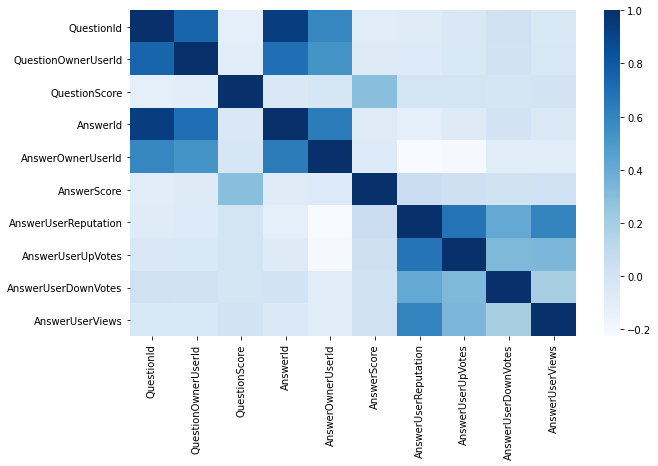

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(QuestionAnswerwithTagandUsers.corr(),cmap='Blues',annot=False) 

In [0]:
QuestionandTag = pd.merge(questionsds, tagsds, on='QuestionId', how='left')
QuestionandTag.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,Tag
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,actionscript-3
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,air
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,tortoisesvn


In [0]:
QuestionandTag.drop(QuestionandTag.columns[[1,2,3,5]], axis =1, inplace= True)
QuestionandTag.head()

,QuestionId,Title,Tag
0,80,SQLStatement.execute() - multiple queries in o...,flex
1,80,SQLStatement.execute() - multiple queries in o...,actionscript-3
2,80,SQLStatement.execute() - multiple queries in o...,air
3,90,Good branching and merging tutorials for Torto...,svn
4,90,Good branching and merging tutorials for Torto...,tortoisesvn


In [0]:
QuestionAnswerwithTagandUsers.isnull().sum()

QuestionId                        0
QuestionOwnerUserId           32423
QuestionCreationDate              0
QuestionScore                     0
Title                             0
QuestionBody                      0
AnswerId                     161648
AnswerOwnerUserId            174848
AnswerCreationDate           161648
AnswerScore                  161648
AnswerBody                   161648
Tag                               0
QuestionUserDisplayName     1070909
QuestionUserCreationDate    1070805
AnswerUserDisplayName        185820
AnswerUserCreationDate       185684
AnswerUserLastAccessDate     185684
AnswerUserReputation         185684
AnswerUserUpVotes            185684
AnswerUserDownVotes          185684
AnswerUserViews              185684
dtype: int64

In [0]:
missingPercForQuesUDN = (QuestionAnswerwithTagandUsers.QuestionUserDisplayName.isnull().sum()/len(QuestionAnswerwithTagandUsers.QuestionUserDisplayName)) * 100
print (missingPercForQuesUDN)

49.21085910804516


In [0]:
missingPercForANsUCD = (QuestionAnswerwithTagandUsers.AnswerUserCreationDate.isnull().sum()/len(QuestionAnswerwithTagandUsers.AnswerUserCreationDate)) * 100
print (missingPercForANsUCD)

8.532628974654484


In [0]:
QuestionAnswerwithTagandUsers.drop(['QuestionUserDisplayName','QuestionUserCreationDate'], axis =1, inplace= True)
QuestionAnswerwithTagandUsers.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820.0,565.0,67.0,3547.0
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]",Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072.0,457.0,136.0,6905.0
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]",stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325.0,25.0,1.0,60.0
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0


In [0]:
QuestionAnswerwithTagandUsers = QuestionAnswerwithTagandUsers[QuestionAnswerwithTagandUsers['AnswerId'].notna()]
QuestionAnswerwithTagandUsers.shape

(2014516, 19)

##EDA Analysis and framing important values

In [0]:
tagsds.Tag.value_counts().mean()

101.25508991737323

In [0]:
tagsds.head()

,QuestionId,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [0]:
tags = tagsds
tags.drop(['QuestionId'], axis =1, inplace= True)
count = tags.Tag.value_counts()
count = count.to_frame() 
count.describe()

,Tag
count,37034.000000
mean,101.255090
std,1578.834319
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,124155.000000


In [0]:
count.reset_index(inplace = True)
count.head()

,index,Tag
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659


In [0]:
count.rename(columns = {'Tag':'NumberOfOccurrences', 'index':'Tag'}, inplace = True) 
count.head()

,Tag,NumberOfOccurrences
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659


In [0]:
count['NumberOfOccurrences'] = count['NumberOfOccurrences'].astype(int)

In [0]:
count.describe()

,NumberOfOccurrences
count,37034.000000
mean,101.255090
std,1578.834319
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,124155.000000


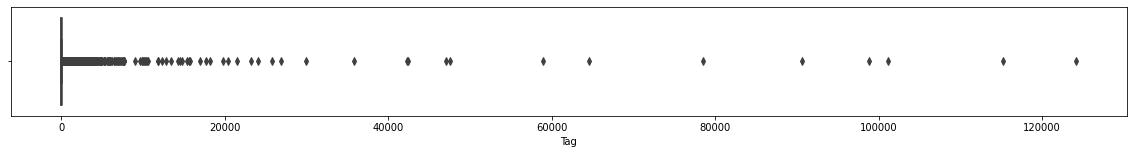

In [0]:
plt.figure(figsize = (20,2))
sns.boxplot(count.NumberOfOccurrences)
plt.show()

In [0]:
morethanmean = count[count['NumberOfOccurrences'] > count['NumberOfOccurrences'].mean()]
morethanmean.shape

(3364, 2)

In [0]:
tagsdsModified = tagsdsModified.to_frame() 


In [0]:
tagsdsModified.reset_index(inplace = True)
tagsdsModified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   index       1264216 non-null  int64 
 1   QuestionId  1264216 non-null  int64 
 2   Tag         1264216 non-null  object
dtypes: int64(2), object(1)
memory usage: 28.9+ MB


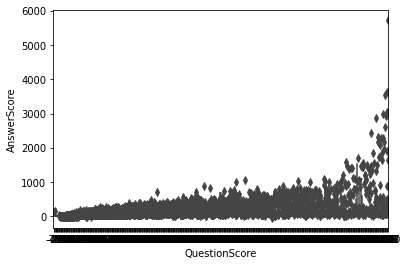

In [0]:
sns.boxplot(data=QuestionAnswerwithTagandUsers, x="QuestionScore",y="AnswerScore")
plt.show()

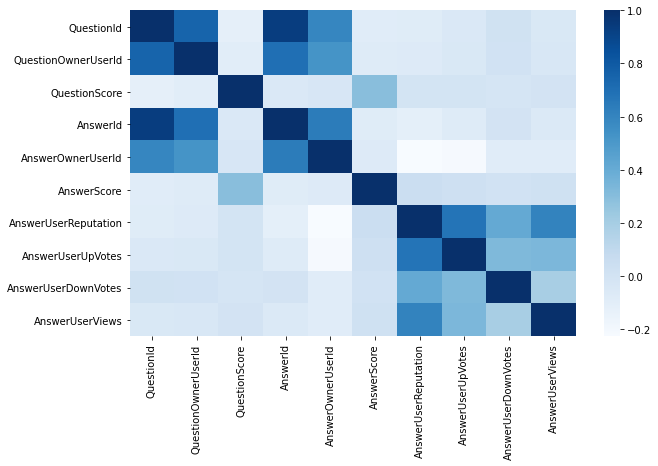

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(QuestionAnswerwithTagandUsers.corr(),cmap='Blues',annot=False) 

In [0]:
QuestionAnswerwithTagandUsers['AnswerCreationDate'] = pd.to_datetime(QuestionAnswerwithTagandUsers['AnswerCreationDate'])
QuestionAnswerwithTagandUsers['QuestionCreationDate'] = pd.to_datetime(QuestionAnswerwithTagandUsers['QuestionCreationDate'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
QuestionAnswerwithTagandUsers['TimeTaken'] = QuestionAnswerwithTagandUsers['AnswerCreationDate'] - QuestionAnswerwithTagandUsers['QuestionCreationDate']
QuestionAnswerwithTagandUsers['TimeTaken']=QuestionAnswerwithTagandUsers['TimeTaken']/np.timedelta64(1,'h')
QuestionAnswerwithTagandUsers.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody,Tag,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews,TimeTaken
0,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01 16:09:47+00:00,12.0,<p>I wound up using this. It is a kind of a ha...,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820.0,565.0,67.0,3547.0,2.211111
1,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13 16:09:09+00:00,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...","[flex, actionscript-3, air]",Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072.0,457.0,136.0,6905.0,290.200556
2,80,26.0,2008-08-01 13:57:07+00:00,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22 15:37:30+00:00,1.0,<p>What about making your delimiter something ...,"[flex, actionscript-3, air]",stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325.0,25.0,1.0,60.0,18769.673056
3,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01 14:45:37+00:00,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers...","[svn, tortoisesvn, branch, branching-and-merging]",Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0,0.070278
4,90,58.0,2008-08-01 14:41:24+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14 18:41:45+00:00,2.0,"<p>You can also try <em><a href=""http://www.co...","[svn, tortoisesvn, branch, branching-and-merging]",Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0,1780.005833


In [0]:
QuestionAnswerwithTagandUsers.drop(['QuestionCreationDate','AnswerCreationDate','QuestionBody','AnswerBody','Title'], axis =1, inplace= True)
QuestionAnswerwithTagandUsers.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,QuestionId,QuestionOwnerUserId,QuestionScore,AnswerId,AnswerOwnerUserId,AnswerScore,Tag,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews,TimeTaken
0,80,26.0,26,124.0,26.0,12.0,"[flex, actionscript-3, air]",Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820.0,565.0,67.0,3547.0,2.211111
1,80,26.0,26,10008.0,1109.0,6.0,"[flex, actionscript-3, air]",Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072.0,457.0,136.0,6905.0,290.200556
2,80,26.0,26,3770976.0,364174.0,1.0,"[flex, actionscript-3, air]",stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325.0,25.0,1.0,60.0,18769.673056
3,90,58.0,144,92.0,61.0,13.0,"[svn, tortoisesvn, branch, branching-and-merging]",Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779.0,1321.0,219.0,1731.0,0.070278
4,90,58.0,144,202317.0,20709.0,2.0,"[svn, tortoisesvn, branch, branching-and-merging]",Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978.0,73.0,2.0,96.0,1780.005833


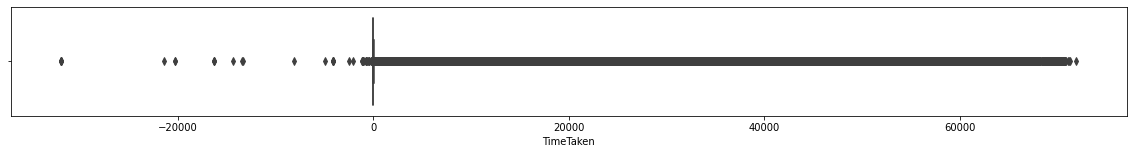

In [0]:
plt.figure(figsize = (20,2))
sns.boxplot(QuestionAnswerwithTagandUsers.TimeTaken)
plt.show()

In [0]:
newcombdf = QuestionAnswerwithTagandUsers
newcombdf.sort_values("TimeTaken", axis = 0, ascending = True, 
                 inplace = True, na_position ='first')
newcombdf.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,QuestionId,QuestionOwnerUserId,QuestionScore,AnswerId,AnswerOwnerUserId,AnswerScore,Tag,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews,TimeTaken
807325,12887700,541686.0,528,579836.0,9530.0,29.0,"[c++, c]",Adam Rosenfield,2008-09-15 19:04:15.067 UTC,2019-08-29 19:19:21.283 UTC,319161.0,9608.0,615.0,20037.0,-31896.541944
807326,12887700,541686.0,528,579945.0,2509.0,20.0,"[c++, c]",dmckee,2008-08-22 15:36:54.363 UTC,2019-08-30 22:31:47.43 UTC,81684.0,5039.0,1385.0,11339.0,-31895.820833
807327,12887700,541686.0,528,579951.0,27727.0,20.0,"[c++, c]",derobert,2008-10-14 05:13:00.58 UTC,2019-09-01 01:57:56.653 UTC,40718.0,1292.0,160.0,3112.0,-31895.780278
807328,12887700,541686.0,528,579955.0,NaN,12.0,"[c++, c]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31895.718056
807329,12887700,541686.0,528,579998.0,34509.0,13.0,"[c++, c]",Johannes Schaub - litb,2008-11-05 00:38:23.89 UTC,2019-08-31 21:13:52.093 UTC,419663.0,5033.0,1992.0,104627.0,-31895.436111


In [0]:
CheckOneData2 = answerds[answerds.QuestionId == 12887700]
CheckOneData2

,AnswerId,AnswerOwnerUserId,AnswerCreationDate,QuestionId,AnswerScore,AnswerBody
31973,579836,9530.0,2009-02-23T23:21:55Z,12887700,29,<pre><code>#include &lt;stdio.h&gt;\n\nint mai...
31981,579945,2509.0,2009-02-24T00:05:11Z,12887700,20,<p>An old chestnut that depends on the C compi...
31982,579951,27727.0,2009-02-24T00:07:37Z,12887700,20,<p><em>The C++ Programming Language (3rd Editi...
31983,579955,NaN,2009-02-24T00:11:21Z,12887700,12,<pre><code>struct abort\n{\n int x;\n};\n\n...
31986,579998,34509.0,2009-02-24T00:28:16Z,12887700,13,<p>Another one listed by the C++ Standard:</p>...
717867,12887719,968261.0,2012-10-14T23:57:11Z,12887700,315,"<p>The following, valid in C and C++, is going..."
717877,12887839,726361.0,2012-10-15T00:19:04Z,12887700,427,<p>Here is an example that takes advantage of ...
717886,12887996,1459996.0,2012-10-15T00:48:45Z,12887700,75,<p>Per C++11 standard:</p>\n\n<p><strong>a.</s...
717900,12888281,362938.0,2012-10-15T01:42:35Z,12887700,138,<p>C90 vs. C++11 (<code>int</code> vs. <code>d...
717975,12890117,179910.0,2012-10-15T06:03:47Z,12887700,368,"<p>For C++ vs. C90, there's at least one way t..."


In [0]:
CheckOneData3 = questionsds[questionsds.QuestionId == 12887700]
CheckOneData3

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody
360933,12887700,541686.0,2012-10-14T23:54:26Z,528,Can code that is valid in both C and C++ produ...,"<p>C and C++ have many differences, and not al..."


In [0]:
answerUserds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 26 to 1990479
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   AnswerOwnerUserId         465460 non-null  int64 
 1   AnswerUserDisplayName     465436 non-null  object
 2   AnswerUserCreationDate    465460 non-null  object
 3   AnswerUserLastAccessDate  465460 non-null  object
 4   AnswerUserReputation      465460 non-null  int64 
 5   AnswerUserUpVotes         465460 non-null  int64 
 6   AnswerUserDownVotes       465460 non-null  int64 
 7   AnswerUserViews           465460 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.0+ MB


In [0]:
answerUserds.head()

,AnswerOwnerUserId,AnswerUserDisplayName,AnswerUserCreationDate,AnswerUserLastAccessDate,AnswerUserReputation,AnswerUserUpVotes,AnswerUserDownVotes,AnswerUserViews
26,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
84,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
86,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
96,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
98,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


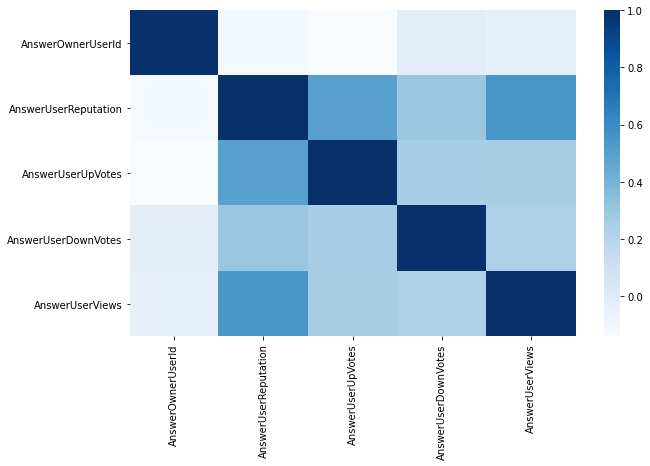

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(answerUserds.corr(),cmap='Blues',annot=False) 

In [0]:
QuestionAnswer.head()

,QuestionId,QuestionOwnerUserId,QuestionCreationDate,QuestionScore,Title,QuestionBody,AnswerId,AnswerOwnerUserId,AnswerCreationDate,AnswerScore,AnswerBody
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...
1,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S..."
2,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,3770976.0,364174.0,2010-09-22T15:37:30Z,1.0,<p>What about making your delimiter something ...
3,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,92.0,61.0,2008-08-01T14:45:37Z,13.0,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
4,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,202317.0,20709.0,2008-10-14T18:41:45Z,2.0,"<p>You can also try <em><a href=""http://www.co..."


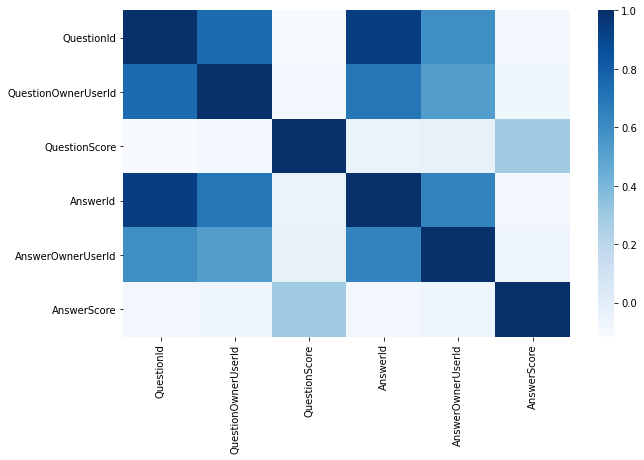

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(QuestionAnswer.corr(),cmap='Blues',annot=False) 

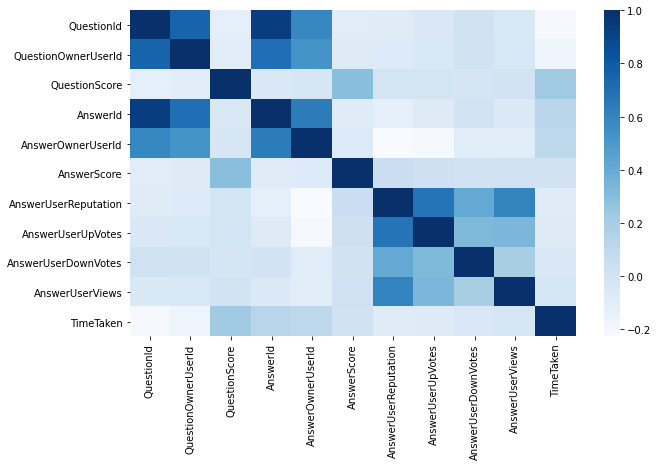

In [0]:

plt.figure(figsize=(10,6))
sns.heatmap(newcombdf.corr(),cmap='Blues',annot=False) 